# Step 1: Install Requirements

In [ ]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15368, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15368 (delta 1), reused 6 (delta 0), pack-reused 15355
Receiving objects: 100% (15368/15368), 14.30 MiB | 21.99 MiB/s, done.
Resolving deltas: 100% (10505/10505), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 7.2 MB/s eta 0:00:00
Setup complete. Using torch 2.0.0+cu118 (Tesla T4)


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/MyDrive/Pedestrian_detection"

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/gdrive/MyDrive/Pedestrian_detection"

In [ ]:
%%writefile data/data.yaml

train: /content/gdrive/MyDrive/Pedestrian_detection/train/images
val: /content/gdrive/MyDrive/Pedestrian_detection/valid/images
test: /content/gdrive/MyDrive/Pedestrian_detection/test/images

nc: 2
names: ['adult', 'child']

roboflow:
  workspace: training-data-kgqsn
  project: pedestrian-detection-v6aln
  version: 15
  license: CC BY 4.0
  url: https://universe.roboflow.com/training-data-kgqsn/pedestrian-detection-v6aln/dataset/15

Writing data/data.yaml


# Step 3: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [ ]:
!python train.py --img 640 --batch 4 --epochs 300 --data data/data.yaml --weights yolov5s.pt --cache

python3: can't open file '/content/train.py': [Errno 2] No such file or directory


In [ ]:
from IPython.display import FileLink
import joblib

# Evaluate Custom YOLOv5 Detector Performance
Training losses and performance metrics are saved to Tensorboard and also to a logfile.

If you are new to these metrics, the one you want to focus on is `mAP_0.5` - learn more about mean average precision [here](https://blog.roboflow.com/mean-average-precision/).

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%reload_ext tensorboard
%tensorboard --logdir runs

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp5/weights/best.pt --img 640 --conf 0.25 --source /content/gdrive/MyDrive/Pedestrian_detection/valid/images

detect: weights=['/content/yolov5/runs/train/exp5/weights/best.pt'], source=/content/gdrive/MyDrive/Pedestrian_detection/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/16 /content/gdrive/.shortcut-targets-by-id/1IrxV75BLZjy-WmG4Kr2gN4lnFC_Oydym/Pedestrian_detection/valid/images/00pedxing01-videoSixteenByNine3000_jpg.rf.279b48b796062223f7ad0a3bbba982fe.jpg: 384x640 7 adults, 65.6ms
image 2/16 /content/gdrive/.shortcut-targets-by-id/1IrxV75BLZjy-WmG4

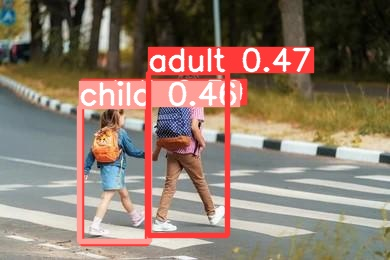

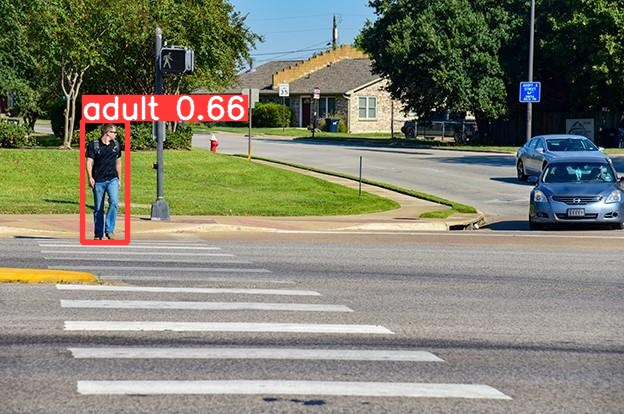

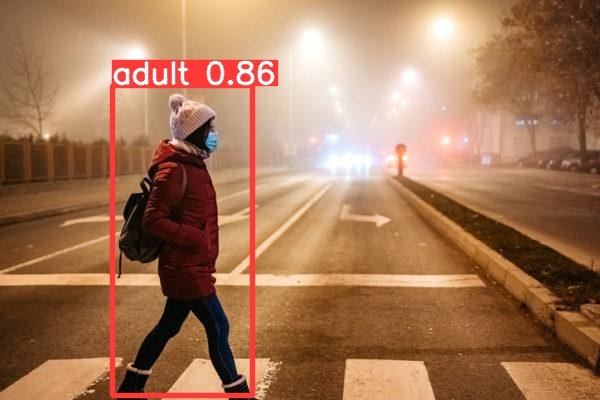

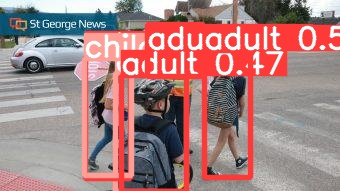

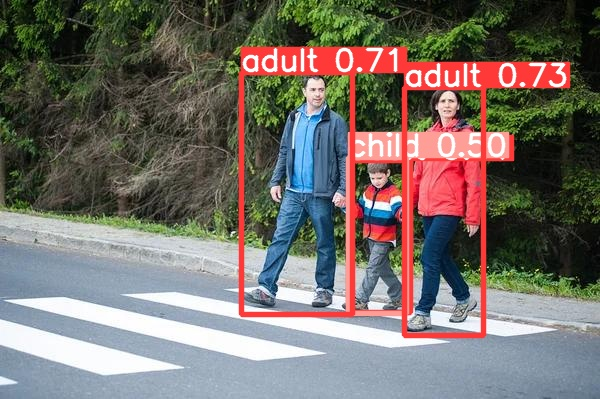

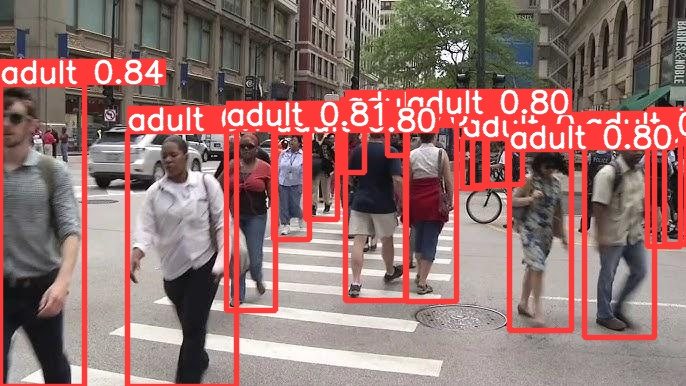

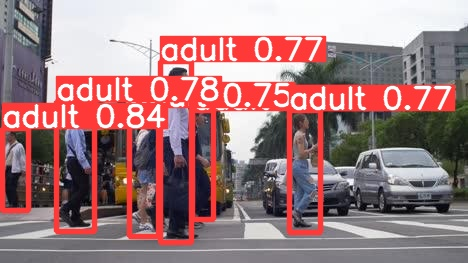

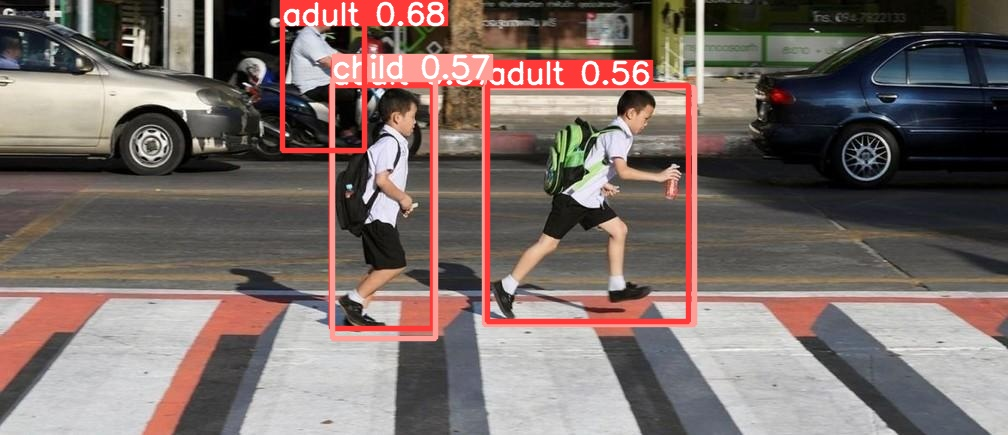

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp3/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Conclusion and Next Steps

Congratulations! You've trained a custom YOLOv5 model to recognize your custom objects.

To improve you model's performance, we recommend first interating on your datasets coverage and quality. See this guide for [model performance improvement](https://github.com/ultralytics/yolov5/wiki/Tips-for-Best-Training-Results).

To deploy your model to an application, see this guide on [exporting your model to deployment destinations](https://github.com/ultralytics/yolov5/issues/251).

Once your model is in production, you will want to continually iterate and improve on your dataset and model via [active learning](https://blog.roboflow.com/what-is-active-learning/).

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>